# Air quality comparison in Turin during 2020
Comparing Google mobility data with air quality data provided by regional autority (ARPA).

In [309]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from matplotlib import dates

## Mobility Dataset:

### Reading mobility data 
Provided by: <br>
Google LLC "Google COVID-19 Community Mobility Reports".
https://www.google.com/covid19/mobility/ 

In [310]:
path = 'data/Mobility/2020_IT_Region_Mobility_Report.csv'
palette = ["blue","red","green","orange","purple","brown"]
labels=['Retail & Recreation','Grocery & Pharmacy','Parks','Transit stations','Workplaces','Residential']
positions = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']

it_mobility_data = pd.read_csv(path, parse_dates=['date'])

### Filtering Data

In [311]:
#Filtering by sub_region
to_mobility_data = it_mobility_data[it_mobility_data['sub_region_2'] == 'Metropolitan City of Turin'].copy()
#remove empty column
to_mobility_data.dropna(how='all', axis=1, inplace=True)

### Multi-Line plot

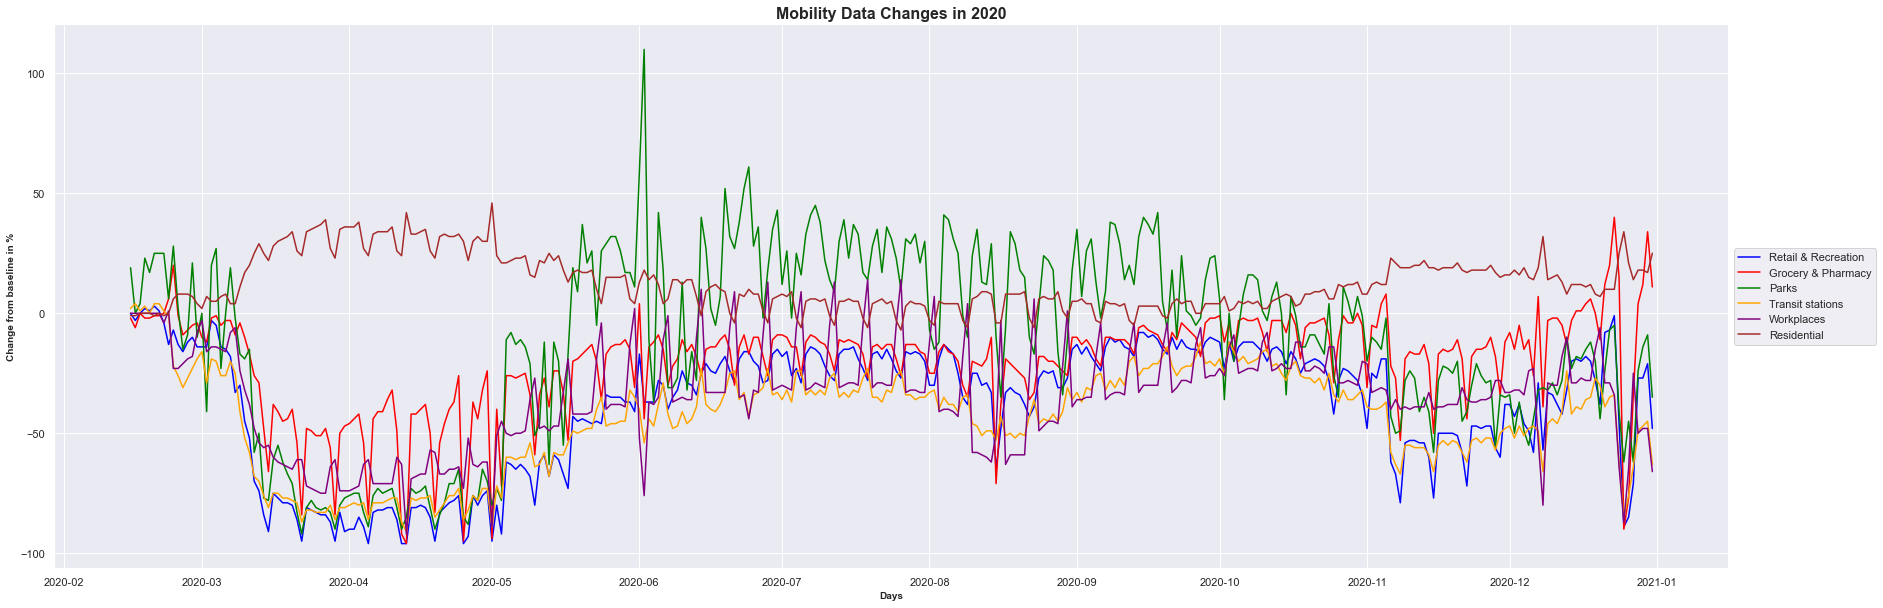

In [312]:
#set seaborn grapichs theme
sns.set_theme()

plt.figure(figsize=(30, 10))




# create a color palette
#palette = plt.get_cmap('Paired')

num = 0
plots =[]

for y in positions:
    line = to_mobility_data[y]
    p = plt.plot(to_mobility_data.date,line, label=labels[num], color=palette[num])
    plots += p
    num+=1

plt.xlabel('Days',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.ylabel('Change from baseline in %',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.legend(handles=plots)
plt.title("Mobility Data Changes in 2020",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
ax = plt.gca()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
sns.despine()
plt.show()

## Air Quality Dataset:

### Reading ARPA data 
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [313]:
def read_ARPA_csv(path):
    dataFrame = pd.read_csv(path, sep=';',dtype={'Data rilevamento': str, 'Ora':str},index_col=False ) 

    #merge date and hours and parsing
    dataFrame["Data rilevamento"] = dataFrame["Data rilevamento"] + " " +  dataFrame["Ora"]
    dataFrame["Data rilevamento"] = pd.to_datetime(dataFrame["Data rilevamento"], format='%d/%m/%Y %H:%M') 
    return dataFrame

def get_daily_adjusted_data(path):
    initial_data=read_ARPA_csv(path)
    #group by day
    data_daily = initial_data.resample('D', on='Data rilevamento').mean()
    #adjusting on baseline
    reference_period = initial_data[(initial_data['Data rilevamento'] >= '2020-01-03') & (initial_data['Data rilevamento'] < '2020-02-06')]
    basevalue = reference_period['Valore'].mean()
    adjusted_data = data_daily[(data_daily.index.get_level_values('Data rilevamento') >= '2020-02-15')]
    return_data = adjusted_data[:]
    return_data['Valore'] = ((return_data['Valore']-basevalue)/basevalue)*100
    return return_data   

### Get Air Quality Data

#### PM10

In [314]:
consolata_pm10=get_daily_adjusted_data('data/ARPA/PM10/Torino-Consolata_Polveri-sottili_2020-01-01_2020-12-31.csv')
rebaudengo_pm10 = get_daily_adjusted_data('data/ARPA/PM10/Torino-Rebaudengo_Polveri-sottili_2020-01-01_2020-12-31.csv')
lingotto_pm10 = get_daily_adjusted_data('data/ARPA/PM10/Torino-Lingotto_Polveri-sottili_2020-01-01_2020-12-31.csv')
rubino_pm10 = get_daily_adjusted_data('data/ARPA/PM10/Torino-Rubino_Polveri-sottili_2020-01-01_2020-12-31.csv')
grassi_pm10 =get_daily_adjusted_data('data/ARPA/PM10/Torino-Grassi_Polveri-sottili_2020-01-01_2020-12-31.csv')
avg_turin_pm10=pd.concat([rebaudengo_pm10,consolata_pm10,lingotto_pm10,rubino_pm10,grassi_pm10]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_pm10 = avg_turin_pm10.rename(columns = {'Valore':'PM10'})

#### NOx

In [315]:
consolata_nox=get_daily_adjusted_data('data/ARPA/NOx/Torino-Consolata_Gas_2020-01-01_2020-12-31.csv')
rebaudengo_nox = get_daily_adjusted_data('data/ARPA/NOx/Torino-Rebaudengo_Gas_2020-01-01_2020-12-31.csv')
lingotto_nox = get_daily_adjusted_data('data/ARPA/NOx/Torino-Lingotto_Gas_2020-01-01_2020-12-31.csv')
rubino_nox = get_daily_adjusted_data('data/ARPA/NOx/Torino-Rubino_Gas_2020-01-01_2020-12-31.csv')
avg_turin_nox=pd.concat([consolata_nox,rebaudengo_nox,lingotto_nox,rubino_nox]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_nox = avg_turin_nox.rename(columns = {'Valore':'NOx'})

#### NO

In [316]:
consolata_no=get_daily_adjusted_data('data/ARPA/NO/Torino-Consolata_Monossido_2020-01-01_2020-12-31.csv')
rebaudengo_no = get_daily_adjusted_data('data/ARPA/NO/Torino-Rebaudengo_Monossido_2020-01-01_2020-12-31.csv')
lingotto_no = get_daily_adjusted_data('data/ARPA/NO/Torino-Lingotto_Monossido_2020-01-01_2020-12-31.csv')
rubino_no = get_daily_adjusted_data('data/ARPA/NO/Torino-Rubino_Monossido_2020-01-01_2020-12-31.csv')
avg_turin_no=pd.concat([consolata_no,rebaudengo_no,lingotto_no,rubino_no]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_no = avg_turin_no.rename(columns = {'Valore':'NO'})

#### NO2

In [317]:
consolata_no2=get_daily_adjusted_data('data/ARPA/NO2/Torino-Consolata_Biossido_2020-01-01_2020-12-31.csv')
rebaudengo_no2 = get_daily_adjusted_data('data/ARPA/NO2/Torino-Rebaudengo_Biossido_2020-01-01_2020-12-31.csv')
lingotto_no2 = get_daily_adjusted_data('data/ARPA/NO2/Torino-Lingotto_Biossido_2020-01-01_2020-12-31.csv')
rubino_no2 = get_daily_adjusted_data('data/ARPA/NO2/Torino-Rubino_Biossido_2020-01-01_2020-12-31.csv')
avg_turin_no2=pd.concat([consolata_no2,rebaudengo_no2,lingotto_no2,rubino_no2]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_no2 = avg_turin_no2.rename(columns = {'Valore':'NO2'})

#### Benzene

In [318]:
consolata_bnz=get_daily_adjusted_data('data/ARPA/Benzene/Torino-Consolata_Idrocarburi-aromatici_2020-01-01_2020-12-31.csv')
rebaudengo_bnz = get_daily_adjusted_data('data/ARPA/Benzene/Torino-Rebaudengo_Idrocarburi-aromatici_2020-01-01_2020-12-31.csv')
lingotto_bnz = get_daily_adjusted_data('data/ARPA/Benzene/Torino-Lingotto_Idrocarburi-aromatici_2020-01-01_2020-12-31.csv')
rubino_bnz = get_daily_adjusted_data('data/ARPA/Benzene/Torino-Rubino_Idrocarburi-aromatici_2020-01-01_2020-12-31.csv')
avg_turin_bnz=pd.concat([consolata_bnz,rebaudengo_bnz,lingotto_bnz,rubino_bnz]).groupby('Data rilevamento', as_index=True).mean()
avg_turin_bnz = avg_turin_bnz.rename(columns = {'Valore':'Benzene'})

#### Rename columns

In [319]:
to_mobility_data= to_mobility_data.rename(columns = {'retail_and_recreation_percent_change_from_baseline':labels[0], 'grocery_and_pharmacy_percent_change_from_baseline':labels[1],
                                    'parks_percent_change_from_baseline':labels[2],'transit_stations_percent_change_from_baseline':labels[3],
                                    'workplaces_percent_change_from_baseline':labels[4],'residential_percent_change_from_baseline':labels[5],})

### Merging both dataset

In [320]:
merged_data = to_mobility_data.merge(avg_turin_nox[['NOx']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(avg_turin_no[['NO']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(avg_turin_no2[['NO2']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(avg_turin_pm10[['PM10']], left_on='date', right_on='Data rilevamento')
merged_data = merged_data.merge(avg_turin_bnz[['Benzene']], left_on='date', right_on='Data rilevamento')

### Merged Lineplot

<Figure size 432x288 with 0 Axes>

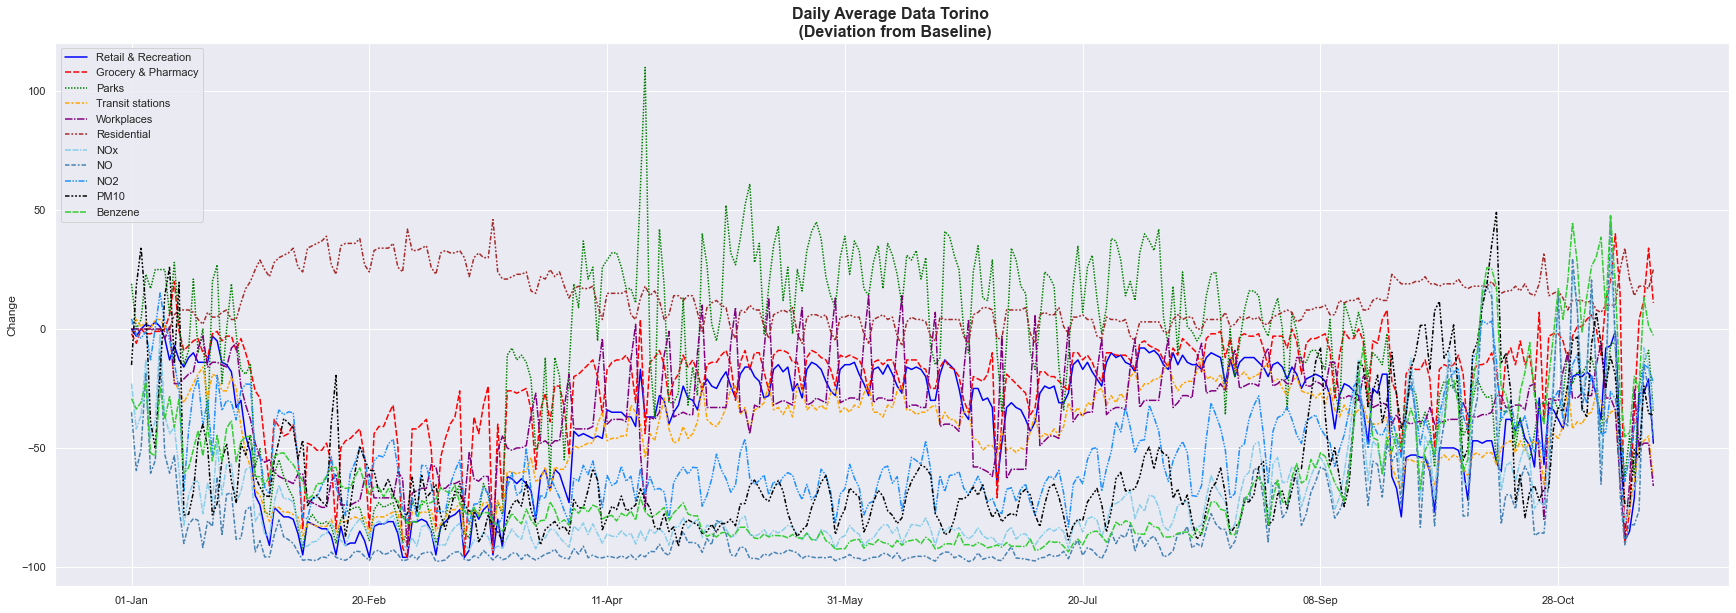

<Figure size 432x288 with 0 Axes>

In [322]:
palette = ["blue","red","green","orange","purple","brown","skyblue","steelblue", "dodgerblue","black", "limegreen"]
fig, ax = plt.subplots(figsize=(30, 10))
chart = sns.lineplot(data=merged_data, palette=palette)
plt.ylabel('Change')
plt.title("Daily Average Data Torino \n (Deviation from Baseline)",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
ax.xaxis.set_major_formatter(dates.DateFormatter("%d-%b"))
plt.figure()



### Save CSV file

In [321]:
# Remove all columns between column index 1 to 3
merged_data.drop(merged_data.iloc[:, 0:6], inplace = True, axis = 1)
#Unpivot a DataFrame from wide to long format
csv_data = merged_data.melt(id_vars="date", value_vars=['Retail & Recreation','Grocery & Pharmacy','Parks','Transit stations','Workplaces','Residential','NOx','NO','NO2','PM10','Benzene'],
      var_name='type', value_name='value', ignore_index=True)
#Save data to CSV file
csv_data.to_csv('data/Output/turin_daily_deviation.csv')
